# import dependencies

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.models import load_model

## load butterfly detection model

In [2]:
model_check = tf.keras.models.load_model('butterfly.keras')

In [3]:
model_check.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

## Load Pickle file with ~ 434 data samples

In [4]:
import pickle

In [5]:
with open('negative_images_v1_434.pkl', 'rb') as f:
    images_1 = pickle.load(f)

In [6]:
len(images_1)

434

## Prepare y_train

In [7]:
images_1 = [row for row in images_1 if len(row) == 4]

In [8]:
ids = []
for row in images_1:
    if row:  # Check if the row is not empty
        id_ = row[0].split('_')  # Split the first item in the row using '_'
        id_num = id_[-1].strip(".jpg")  # Take the last part and strip ".jpg"
        ids.append(id_num)  # Append the id number to the list

print(ids)

['I36455', 'I40084', 'I350867', 'I155036', 'I461003', 'I17302', 'I66060', 'I17305', 'I147112', 'I173730', 'I271852', 'I269132', 'I196449', 'I13718', 'I269130', 'I14436', 'I185091', 'I39069', 'I173462', 'I17375', 'I24261', 'I461002', 'I113280', 'I155060', 'I757598', 'I13724', 'I13723', 'I466049', 'I55770', 'I14439', 'I346410', 'I17379', 'I98934', 'I26117', 'I99433', 'I271853', 'I18213', 'I26114', 'I152600', 'I18209', 'I266984', 'I113283', 'I116762', 'I71098', 'I143219', 'I47330', 'I16993', 'I28559', 'I66317', 'I37160', 'I98931', 'I135397', 'I116287', 'I39066', 'I108153', 'I40504', 'I116550', 'I116573', 'I11647', 'I16990', 'I152887', 'I45005', 'I15950', 'I40081', 'I136593', 'I217944', 'I36116', 'I28562', 'I114998', 'I214840', 'I113296', 'I37163', 'I29707', 'I166430', 'I116547', 'I64127', 'I24267', 'I116284', 'I166843', 'I743660', 'I112819', 'I143297', 'I399698', 'I346403', 'I196445', 'I143294', 'I99430', 'I114995', 'I55773', 'I757599', 'I55277', 'I70098', 'I112816', 'I155042', 'I454834',

In [9]:
# Example list of IDs

# Load the CSV file into a pandas DataFrame
csv_file = 'newAxial_6_26_2024.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Initialize lists for IDs and corresponding categories
y = []

# Find categories for each ID in id_list
for id_num in ids:
    row = df[df['Image Data ID'] == id_num]
    y.append(row['Group'].iloc[0])  # Assuming 'Category' is a single value per ID


# Load Additional Data

In [12]:
with open('negative_images_v1_1054.pkl', 'rb') as f:
    images_2 = pickle.load(f)

In [18]:
len(images_2)

916

In [17]:
images_2 = [row for row in images_2 if len(row) == 4]

In [19]:
ids_2 = []
for row in images_2:
    if row:  # Check if the row is not empty
        id_ = row[0].split('_')  # Split the first item in the row using '_'
        id_num = id_[-1].strip(".jpg")  # Take the last part and strip ".jpg"
        ids_2.append(id_num)  # Append the id number to the list

print(ids_2)

['I136948', 'I19173', 'I19773', 'I30619', 'I142383', 'I41565', 'I98663', 'I104001', 'I24978', 'I56167', 'I14920', 'I119019', 'I56741', 'I41568', 'I23234', 'I131028', 'I104002', 'I106641', 'I128189', 'I97655', 'I58143', 'I435640', 'I79454', 'I20451', 'I137088', 'I38396', 'I29208', 'I106256', 'I56170', 'I113518', 'I55412', 'I31237', 'I25773', 'I88589', 'I96378', 'I47809', 'I119426', 'I30219', 'I93698', 'I14226', 'I20486', 'I76798', 'I29378', 'I106644', 'I114945', 'I111823', 'I15496', 'I79436', 'I79441', 'I96367', 'I109879', 'I58147', 'I27781', 'I79458', 'I69315', 'I72062', 'I63217', 'I37832', 'I117267', 'I93694', 'I76388', 'I31240', 'I77107', 'I44209', 'I32628', 'I89545', 'I30616', 'I14337', 'I39504', 'I44617', 'I45062', 'I66500', 'I136935', 'I84146', 'I19137', 'I89164', 'I29205', 'I19770', 'I76385', 'I14814', 'I120218', 'I120213', 'I103997', 'I38605', 'I55825', 'I137064', 'I97397', 'I25027', 'I25776', 'I109472', 'I57372', 'I31188', 'I139359', 'I16668', 'I113515', 'I37349', 'I40544', 'I9

In [25]:
# Example list of IDs

# Load the CSV file into a pandas DataFrame
csv_file = 'verynewAxial_7_10_2024.csv'  # Replace with your actual CSV file path
df_2 = pd.read_csv(csv_file)

# Initialize lists for IDs and corresponding categories
y_2 = []

# Find categories for each ID in id_list
for id_num in ids_2:
    row = df_2[df_2['Image Data ID'] == id_num]
    y_2.append(row['Group'].iloc[0])  # Assuming 'Category' is a single value per ID


In [26]:
images_1 += images_2

In [27]:
y += y_2

In [28]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example y labels (replace with your actual labels)

# Initialize the LabelEncoder
map = {"CN":0, "MCI":1,"AD":2}

y = [map[label] for label in y]
# print("Original labels:", y)
# print("Numeric labels:", y_numeric)

## Image enhancements

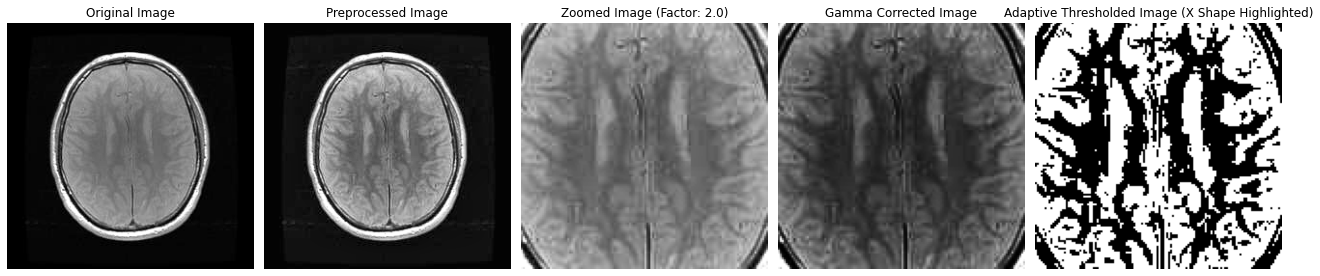

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess, zoom into the central brain region, and highlight the X shape
def preprocess_zoom_and_highlight_better(value, image_path, zoom_factor, block_size=31):
    # Preprocess the image
    def preprocess_image(image):
        # Apply contrast adjustment to each channel
        alpha = 1.5  # Contrast control (1.0-3.0)
        adjusted_image = np.clip(alpha * image, 0, 255).astype(np.uint8)
        
        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to each channel
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = np.zeros_like(adjusted_image)
        for i in range(3):  # Assuming image has 3 channels (RGB)
            clahe_image[:, :, i] = clahe.apply(adjusted_image[:, :, i])
        
        return adjusted_image, clahe_image
    
    # Read the image in color
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Preprocess the image
    original_image, preprocessed_image = preprocess_image(image)
    
    # Get image dimensions
    height, width, _ = preprocessed_image.shape
    
    # Calculate zoomed dimensions
    new_height = int(height / zoom_factor)
    new_width = int(width / zoom_factor)
    
    # Calculate crop boundaries to zoom into the central region
    crop_x = (width - new_width) // 2
    crop_y = (height - new_height) // 2
    
    # Zoom into the central region of the preprocessed image
    zoomed_image = preprocessed_image[crop_y:crop_y + new_height, crop_x:crop_x + new_width]
    
    # Enhance contrast further using gamma correction
    gamma = 1.85
    gamma_corrected = np.clip(np.power(zoomed_image / 255.0, gamma) * 255.0, 0, 255).astype(np.uint8)
    
    # Apply adaptive thresholding to highlight the X shape for each channel separately
    binary_image = np.zeros_like(gamma_corrected)
    for i in range(3):  # Assuming image has 3 channels (RGB)
        gray_channel = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2GRAY)
        _, binary_channel = cv2.threshold(gray_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        binary_channel = cv2.adaptiveThreshold(gray_channel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, 5)
        binary_image[:, :, i] = binary_channel
    
    # Display original, preprocessed, zoomed, and highlighted images using Matplotlib
    if value:
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 5, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 5, 2)
        plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
        plt.title('Preprocessed Image')
        plt.axis('off')

        plt.subplot(1, 5, 3)
        plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Zoomed Image (Factor: {zoom_factor})')
        plt.axis('off')

        plt.subplot(1, 5, 4)
        plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
        plt.title('Gamma Corrected Image')
        plt.axis('off')

        plt.subplot(1, 5, 5)
        plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))
        plt.title('Adaptive Thresholded Image (X Shape Highlighted)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    
    return original_image, preprocessed_image, zoomed_image, binary_image, gamma_corrected

# Example usage with image_path and zoom_factor
image_path = images_1[22][0]  # Replace with your image path
zoom_factor = 2.0  # Adjust zoom factor as needed

original_image, preprocessed_image, zoomed_image, Adaptive_Thresholded, gamma_corrected = preprocess_zoom_and_highlight_better(True, image_path, zoom_factor)


## Build CNN

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Reshape, MaxPooling2D, BatchNormalization, ReLU, Dropout, Reshape, LSTM, TimeDistributed
from tensorflow.keras.regularizers import l2

In [31]:
shape_CNN = (10,256,256,32)
shape = (4,128,128,3)
shape_new = (4,128,128,1)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define the CNN Model for Feature Extraction
def build_cnn_model(input_shape):
    model_input = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    model_output = Dense(256, activation='relu')(x)
    
    return Model(model_input, model_output)

input_shape = (128, 128, 3)  # Adjust the shape according to your images

# Define the Combined CNN-RNN Model
def build_cnn_rnn_model(input_shape, timesteps):
    cnn_model = build_cnn_model(input_shape)
    cnn_input = Input(shape=(timesteps,) + input_shape)
    
    x = TimeDistributed(cnn_model)(cnn_input)
    
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64)(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    model_output = Dense(3, activation='softmax')(x)
    
    model = Model(cnn_input, model_output)
    
    return model

timesteps = 4  # Number of MRI slices per sample
model = build_cnn_rnn_model(input_shape, timesteps)

# Compile the Model
# Compile the Model with sparse categorical crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4, 128, 128, 3)]  0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 256)            8483008   
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 128)            197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195 

## Train the model

In [33]:
from sklearn.utils import shuffle

### Try using Gamma Images

In [41]:
# Preprocess Images Using Your Function
def preprocess_images(image_paths, zoom_factor):
    preprocessed_images = []
    for path in image_paths:
        _, _, _, _, gamma_corrected = preprocess_zoom_and_highlight_better(False, path, zoom_factor)
        preprocessed_images.append(gamma_corrected)
    return np.array(preprocessed_images)

# Example Data Loading
data = []
labels = []

# Replace `all_sample_paths` and `all_labels` with your actual data loading logic
zoom_factor = 2.0  # Adjust zoom factor as needed
for sample_paths, label in zip(images_1, y):
    images = preprocess_images(sample_paths, zoom_factor)  # sample_paths is a list of 4 image paths for each sample
    data.append(images)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)
data, labels = shuffle(data, labels, random_state=42)  # random_state for reproducibility

In [61]:
model.fit(data,labels,epochs = 20, batch_size = 10, validation_split = 0.2)

Epoch 1/20
33/33 [==============================] - 14s 338ms/step - loss: 1.0994 - accuracy: 0.3815 - val_loss: 1.0892 - val_accuracy: 0.4268
Epoch 2/20
33/33 [==============================] - 10s 313ms/step - loss: 1.0885 - accuracy: 0.3815 - val_loss: 1.0691 - val_accuracy: 0.4390
Epoch 3/20
33/33 [==============================] - 10s 317ms/step - loss: 1.0672 - accuracy: 0.4277 - val_loss: 1.0915 - val_accuracy: 0.3659
Epoch 4/20
33/33 [==============================] - 10s 313ms/step - loss: 1.0664 - accuracy: 0.4277 - val_loss: 1.0809 - val_accuracy: 0.4024
Epoch 5/20
33/33 [==============================] - 10s 312ms/step - loss: 1.0585 - accuracy: 0.3692 - val_loss: 1.1319 - val_accuracy: 0.3537
Epoch 6/20
33/33 [==============================] - 10s 310ms/step - loss: 1.0440 - accuracy: 0.4338 - val_loss: 1.0697 - val_accuracy: 0.3902
Epoch 7/20
33/33 [==============================] - 10s 314ms/step - loss: 1.0389 - accuracy: 0.4185 - val_loss: 1.1104 - val_accuracy: 0.3415

### Try using Adaptive Threshold Images

In [36]:
# Preprocess Images Using Your Function
def preprocess_images_2(image_paths, zoom_factor):
    preprocessed_images = []
    for path in image_paths:
        _, _, _, Adaptive_Thresholded, _ = preprocess_zoom_and_highlight_better(False, path, zoom_factor)
        preprocessed_images.append(Adaptive_Thresholded)
    return np.array(preprocessed_images)

# Example Data Loading
data = []
labels = []

# Replace `all_sample_paths` and `all_labels` with your actual data loading logic
zoom_factor = 2.0  # Adjust zoom factor as needed
for sample_paths, label in zip(images_1, y):
    images = preprocess_images_2(sample_paths, zoom_factor)  # sample_paths is a list of 4 image paths for each sample
    data.append(images)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)
data, labels = shuffle(data, labels, random_state=42)  # random_state for reproducibility

In [21]:
model.fit(data,labels,epochs = 20, batch_size = 10, validation_split = 0.2)

Epoch 1/20
33/33 [==============================] - 40s 988ms/step - loss: 1.1252 - accuracy: 0.3662 - val_loss: 1.1028 - val_accuracy: 0.3415
Epoch 2/20
33/33 [==============================] - 27s 829ms/step - loss: 1.0497 - accuracy: 0.4615 - val_loss: 1.1340 - val_accuracy: 0.3537
Epoch 3/20
33/33 [==============================] - 32s 974ms/step - loss: 0.8915 - accuracy: 0.6338 - val_loss: 1.1866 - val_accuracy: 0.4146
Epoch 4/20
33/33 [==============================] - 28s 840ms/step - loss: 0.7051 - accuracy: 0.7477 - val_loss: 1.1331 - val_accuracy: 0.5244
Epoch 5/20
33/33 [==============================] - 31s 941ms/step - loss: 0.4899 - accuracy: 0.8277 - val_loss: 1.1144 - val_accuracy: 0.5854
Epoch 6/20
33/33 [==============================] - 28s 848ms/step - loss: 0.2761 - accuracy: 0.9046 - val_loss: 1.3129 - val_accuracy: 0.5976
Epoch 7/20
33/33 [==============================] - 29s 892ms/step - loss: 0.2177 - accuracy: 0.9262 - val_loss: 1.6247 - val_accuracy: 0.5732

### ResNet on Gamma

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.applications import ResNet50

# Define the ResNet model for feature extraction
def build_resnet_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model layers for transfer learning
    
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    
    return Model(inputs=base_model.input, outputs=x)

# Define the Combined ResNet-RNN Model
def build_resnet_rnn_model(input_shape, timesteps):
    resnet_model = build_resnet_model(input_shape)
    cnn_input = Input(shape=(timesteps,) + input_shape)
    
    x = TimeDistributed(resnet_model)(cnn_input)
    
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64)(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    model_output = Dense(3, activation='softmax')(x)
    
    model = Model(cnn_input, model_output)
    
    return model

# Define input shape
input_shape = (128, 128, 3)  # Adjust as needed
timesteps = 4  # Number of MRI slices per sample

# Build and compile the model
model_rn = build_resnet_rnn_model(input_shape, timesteps)
model_rn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4, 128, 128, 3)]  0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 256)            8483008   
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 128)            197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195 

In [44]:
model_rn.fit(data,labels,epochs = 20, batch_size = 10, validation_split = 0.2)

Epoch 1/20
106/106 [==============================] - 67s 564ms/step - loss: 1.1200 - accuracy: 0.3469 - val_loss: 1.1033 - val_accuracy: 0.3057
Epoch 2/20
106/106 [==============================] - ETA: 0s - loss: 1.1032 - accuracy: 0.3374

KeyboardInterrupt: 

In [18]:
model_rn.fit(data,labels,epochs = 20, batch_size = 10, validation_split = 0.2)

Epoch 1/20
33/33 [==============================] - 48s 1s/step - loss: 1.1108 - accuracy: 0.3477 - val_loss: 1.1426 - val_accuracy: 0.3293
Epoch 2/20
33/33 [==============================] - 33s 1s/step - loss: 1.1102 - accuracy: 0.3692 - val_loss: 1.1065 - val_accuracy: 0.3293
Epoch 3/20
33/33 [==============================] - 36s 1s/step - loss: 1.0912 - accuracy: 0.3908 - val_loss: 1.0987 - val_accuracy: 0.4146
Epoch 4/20
33/33 [==============================] - 48s 1s/step - loss: 1.0746 - accuracy: 0.4154 - val_loss: 1.0854 - val_accuracy: 0.3659
Epoch 5/20
33/33 [==============================] - 47s 1s/step - loss: 1.0490 - accuracy: 0.4246 - val_loss: 1.0902 - val_accuracy: 0.3537
Epoch 6/20
33/33 [==============================] - 43s 1s/step - loss: 1.0036 - accuracy: 0.4862 - val_loss: 1.0823 - val_accuracy: 0.3780
Epoch 7/20
33/33 [==============================] - 46s 1s/step - loss: 0.9480 - accuracy: 0.5569 - val_loss: 1.0975 - val_accuracy: 0.4268
Epoch 8/20
33/33 [==

### ResNet on Adaptive Threshold

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.applications import ResNet152

# Define the ResNet model for feature extraction
def build_resnet_model(input_shape):
    base_model = ResNet152(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model layers for transfer learning
    
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    
    return Model(inputs=base_model.input, outputs=x)

# Define the Combined ResNet-RNN Model
def build_resnet_rnn_model(input_shape, timesteps):
    resnet_model = build_resnet_model(input_shape)
    cnn_input = Input(shape=(timesteps,) + input_shape)
    
    x = TimeDistributed(resnet_model)(cnn_input)
    
    x = LSTM(512, return_sequences=True)(x)
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(128)(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    model_output = Dense(3, activation='softmax')(x)
    
    model = Model(cnn_input, model_output)
    
    return model

# Define input shape
input_shape = (128, 128, 3)  # Adjust as needed
timesteps = 4  # Number of MRI slices per sample

# Build and compile the model
model_rn = build_resnet_rnn_model(input_shape, timesteps)
model_rn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model_rn.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4, 128, 128, 3)]  0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 1024)           60469120  
_________________________________________________________________
lstm_4 (LSTM)                (None, 4, 512)            3147776   
_________________________________________________________________
lstm_5 (LSTM)                (None, 4, 256)            787456    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0   

In [ ]:
model_rn.fit(data,labels,epochs = 20, batch_size = 10, validation_split = 0.2)

Epoch 1/20
33/33 [==============================] - 47s 1s/step - loss: 1.0990 - accuracy: 0.3785 - val_loss: 1.1027 - val_accuracy: 0.3293
Epoch 2/20
33/33 [==============================] - 47s 1s/step - loss: 1.0946 - accuracy: 0.3846 - val_loss: 1.1062 - val_accuracy: 0.3293
Epoch 3/20
33/33 [==============================] - 47s 1s/step - loss: 1.0994 - accuracy: 0.3846 - val_loss: 1.1021 - val_accuracy: 0.3293
Epoch 4/20
33/33 [==============================] - 47s 1s/step - loss: 1.0970 - accuracy: 0.3969 - val_loss: 1.1017 - val_accuracy: 0.3293
Epoch 5/20
33/33 [==============================] - 46s 1s/step - loss: 1.0953 - accuracy: 0.3846 - val_loss: 1.1037 - val_accuracy: 0.3293
Epoch 6/20
33/33 [==============================] - 49s 1s/step - loss: 1.0945 - accuracy: 0.3815 - val_loss: 1.1048 - val_accuracy: 0.3293
Epoch 7/20
33/33 [==============================] - ETA: 0s - loss: 1.0902 - accuracy: 0.3785

# ViT

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_vit_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Create patches
    patches = layers.Conv2D(128, kernel_size=16, strides=16)(inputs)  # Increased filter size
    patches = layers.Reshape((-1, 128))(patches)  # Flatten patches

    # Add position embeddings
    position_embedding = layers.Embedding(input_dim=1000, output_dim=128)(tf.range(start=0, limit=tf.shape(patches)[1], delta=1))
    patches = patches + position_embedding

    # Transformer blocks
    for _ in range(8):  # Increased number of transformer layers
        x = layers.LayerNormalization(epsilon=1e-6)(patches)
        attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=128)(x, x)  # Increased num_heads
        x = layers.Add()([x, attention_output])
        
        x = layers.LayerNormalization(epsilon=1e-6)(x)
        ffn = layers.Dense(512, activation='relu')(x)  # Increased feed-forward layer size
        ffn_output = layers.Dense(128)(ffn)
        patches = layers.Add()([x, ffn_output])

    # Pooling and output layer
    pooled_output = layers.GlobalAveragePooling1D()(patches)
    outputs = layers.Dense(num_classes, activation='softmax')(pooled_output)

    model = models.Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (4, 128, 128, 3)
num_classes = 3  # Adjust based on your number of classes

# Create the ViT model
vit_model = create_vit_model(input_shape, num_classes)

# Compile the model for sparse categorical labels
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For integer-encoded labels
                  metrics=['accuracy'])

vit_model.summary()


Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 4, 128, 128, 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 4, 8, 8, 128) 98432       input_23[0][0]                   
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 256, 128)     0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
tf.compat.v1.shape_10 (TFOpLamb (3,)                 0           reshape_3[0][0]                  
___________________________________________________________________________________________

In [71]:
# Compile the model for sparse categorical labels
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For integer-encoded labels
                  metrics=['accuracy'])


In [72]:
data.shape

(407, 4, 128, 128, 3)

In [73]:
vit_model.fit(data,labels,epochs = 20, batch_size = 10, validation_split = 0.2)

Epoch 1/20
33/33 [==============================] - 65s 2s/step - loss: 2.1568 - accuracy: 0.3200 - val_loss: 1.1569 - val_accuracy: 0.3171
Epoch 2/20
33/33 [==============================] - 54s 2s/step - loss: 1.1761 - accuracy: 0.3631 - val_loss: 1.2228 - val_accuracy: 0.3537
Epoch 3/20
33/33 [==============================] - 54s 2s/step - loss: 1.1857 - accuracy: 0.3723 - val_loss: 1.2874 - val_accuracy: 0.3293
Epoch 4/20
33/33 [==============================] - 54s 2s/step - loss: 1.1828 - accuracy: 0.3692 - val_loss: 1.2094 - val_accuracy: 0.3293
Epoch 5/20
33/33 [==============================] - 54s 2s/step - loss: 1.1638 - accuracy: 0.3600 - val_loss: 1.1018 - val_accuracy: 0.3171
Epoch 6/20
33/33 [==============================] - 54s 2s/step - loss: 1.1399 - accuracy: 0.3631 - val_loss: 1.1811 - val_accuracy: 0.3293
Epoch 7/20
33/33 [==============================] - 55s 2s/step - loss: 1.2596 - accuracy: 0.2677 - val_loss: 1.1208 - val_accuracy: 0.3293
Epoch 8/20
18/33 [==

KeyboardInterrupt: 

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.applications import InceptionV3, DenseNet201, MobileNetV2

# Define a function to build a model using a specified backbone
def build_model(architecture, input_shape, timesteps):
    if architecture == 'inception':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif architecture == 'densenet':
        base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    elif architecture == 'mobilenet':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Unsupported architecture. Choose 'inception', 'densenet', or 'mobilenet'.")

    base_model.trainable = False  # Freeze the base model layers for transfer learning
    
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)

    cnn_input = Input(shape=(timesteps,) + input_shape)
    x = TimeDistributed(Model(inputs=base_model.input, outputs=x))(cnn_input)
    
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64)(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    model_output = Dense(3, activation='softmax')(x)
    
    model = Model(cnn_input, model_output)
    
    return model

# Define input shape
input_shape = (128, 128, 3)  # Adjust as needed
timesteps = 4  # Number of MRI slices per sample

# Build and compile models using different architectures
for architecture in ['inception', 'densenet', 'mobilenet']:
    model = build_model(architecture, input_shape, timesteps)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    print(f"Model Summary for {architecture}:")
    model.summary()
    model.fit(data, labels, epochs=20, batch_size=16, validation_split=0.2)


Model Summary for inception:
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 4, 128, 128, 3)]  0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 256)            22327328  
_________________________________________________________________
lstm_9 (LSTM)                (None, 4, 128)            197120    
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_213 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_168 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_214 (Dense)            

KeyboardInterrupt: 

# Results

In [78]:
images = ["Gamma","Adaptive Threshold","Preprocessed"]
models = ["CRNN","ResNet","larger ResNet","ViT","inception","densenet","mobilenet"]
scores = [[42.68,64.63,None,None,33,35,33],[70.73,33,33,33,33,33,None],[None,None,None,None,None,None]]

In [79]:
results = pd.DataFrame(scores,columns = models,index = images)

In [80]:
results

,CRNN,ResNet,larger ResNet,ViT,inception,densenet,mobilenet
Gamma,42.68,64.63,NaN,NaN,33.0,35.0,33.0
Adaptive Threshold,70.73,33.00,33.0,33.0,33.0,33.0,NaN
Preprocessed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
